In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Datasets/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [ ]:
data.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2.075259e+06
unique,4187,533,2838,222,89,82,NaN
top,?,0.000,?,1.000,0.000,0.000,NaN
freq,25979,481561,25979,172785,1880175,1436830,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.416570e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.419505e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [ ]:
data.replace('?', np.nan, inplace =True)

In [ ]:
#changing erroneous data types
cols = list(data.columns)
for col in cols:
    data[col] = data[col].astype(str).astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


In [ ]:
#check for missing values 
data.isnull().values.any()

True

In [ ]:
#filling missing values
data = data.fillna(data.mean())
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
#rechecking summary statistics
data.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091373e+00,1.237164e-01,2.435335e+02,4.630594e+00,1.121211e+00,1.298031e+00,6.416570e+00
std,1.050167e+00,1.121103e-01,4.183342e+00,4.412327e+00,6.065988e+00,5.722075e+00,8.455898e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.410500e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.429700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
#correlation
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.398231,0.998889,0.484401,0.434569,0.635876
Global_reactive_power,0.247017,1.000000,-0.111817,0.266120,0.123111,0.139231,0.089241
Voltage,-0.398231,-0.111817,1.000000,-0.409785,-0.195225,-0.166764,-0.269886
Global_intensity,0.998889,0.266120,-0.409785,1.000000,0.489298,0.440347,0.623912
Sub_metering_1,0.484401,0.123111,-0.195225,0.489298,1.000000,0.054721,0.102141
Sub_metering_2,0.434569,0.139231,-0.166764,0.440347,0.054721,1.000000,0.080533
Sub_metering_3,0.635876,0.089241,-0.269886,0.623912,0.102141,0.080533,1.000000


In [48]:
from scipy.stats import pearsonr
list1 = data['Global_intensity']
list2 = data['Voltage']
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation b/w Global_active_power and Global_reactive_power: %.3f' % corr)

Pearsons correlation b/w Global_active_power and Global_reactive_power: -0.410


In [ ]:
daily_data = data.resample('D').sum()

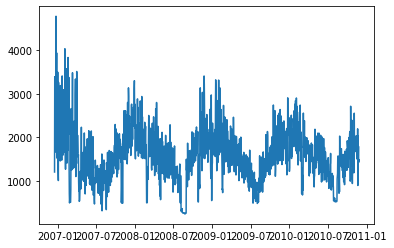

In [ ]:
plt.plot(daily_data.index, daily_data.Global_active_power)

In [ ]:
daily_data.shape

(1442, 7)

In [ ]:
#splitting data
daily_data.reset_index(inplace=True)
X_test = daily_data.tail(365)
X_train = daily_data[:-365]

In [ ]:
df = daily_data[['datetime','Global_active_power']]
daily_new = df.rename(columns = {'datetime':'ds', 'Global_active_power':'y'})

In [ ]:
from fbprophet import Prophet
X_test_df = daily_new.tail(365)
X_train_df = daily_new[:-365]

In [ ]:
#model building
model = Prophet()
model.fit(X_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods = 365, freq = 'D')
result_df = model.predict(future)

In [ ]:
#shape of result
result_df.shape

(1442, 19)

In [ ]:
#check the result df
result_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1650.071328,1841.116249,3015.663294,1650.071328,1650.071328,775.004842,775.004842,775.004842,245.813256,245.813256,245.813256,529.191586,529.191586,529.191586,0.0,0.0,0.0,2425.076170
1,2006-12-17,1649.910702,1846.111131,2974.769194,1649.910702,1649.910702,771.844221,771.844221,771.844221,228.519177,228.519177,228.519177,543.325044,543.325044,543.325044,0.0,0.0,0.0,2421.754924
2,2006-12-18,1649.750077,1528.793109,2648.982022,1649.750077,1649.750077,397.001867,397.001867,397.001867,-161.286790,-161.286790,-161.286790,558.288657,558.288657,558.288657,0.0,0.0,0.0,2046.751944
3,2006-12-19,1649.589452,1629.038526,2753.120111,1649.589452,1649.589452,544.306666,544.306666,544.306666,-29.332428,-29.332428,-29.332428,573.639094,573.639094,573.639094,0.0,0.0,0.0,2193.896118
4,2006-12-20,1649.428826,1676.641732,2764.493383,1649.428826,1649.428826,564.208290,564.208290,564.208290,-24.708851,-24.708851,-24.708851,588.917141,588.917141,588.917141,0.0,0.0,0.0,2213.637116


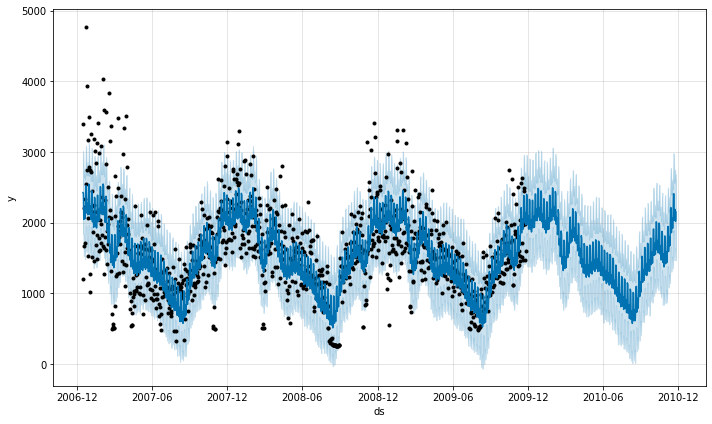

In [ ]:
#plot results
model.plot(result_df)
plt.show()

In [ ]:
#mean abs percent error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(X_test_df['y'], result_df['yhat'][-365:])    

20.815831963532684

In [ ]:
#root mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(X_test_df['y'], result_df['yhat'][-365:]))
print(rmse)

374.604233946713


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



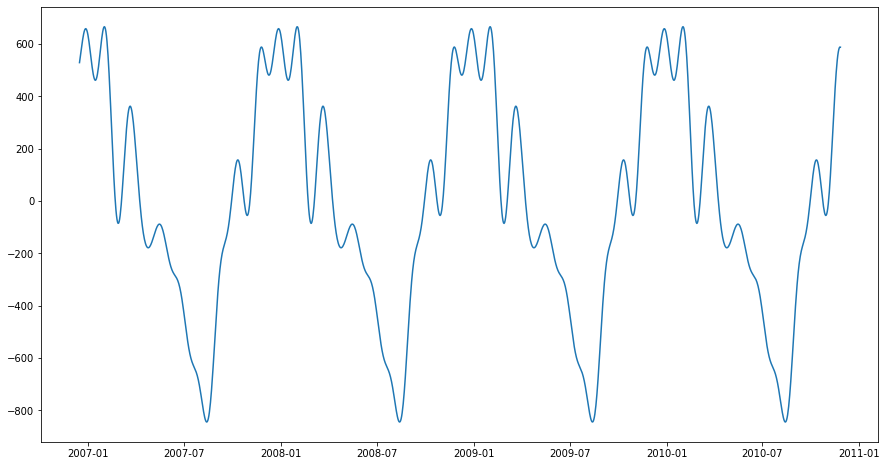

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(result_df['ds'], result_df['yearly'])
plt.show()

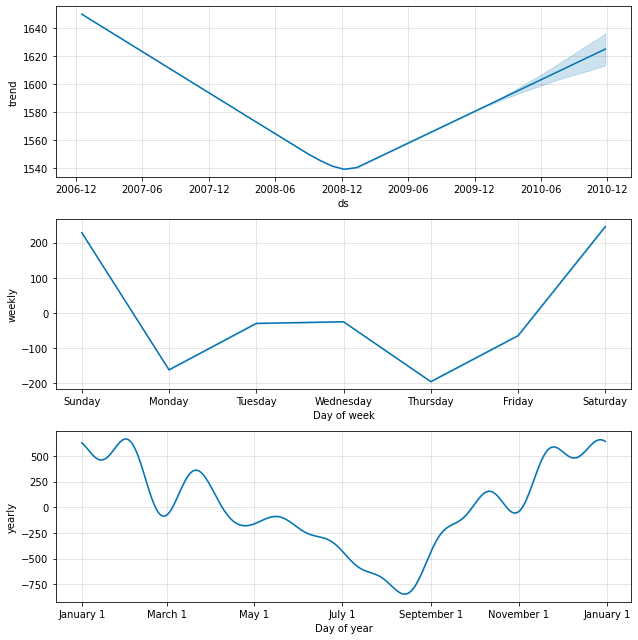

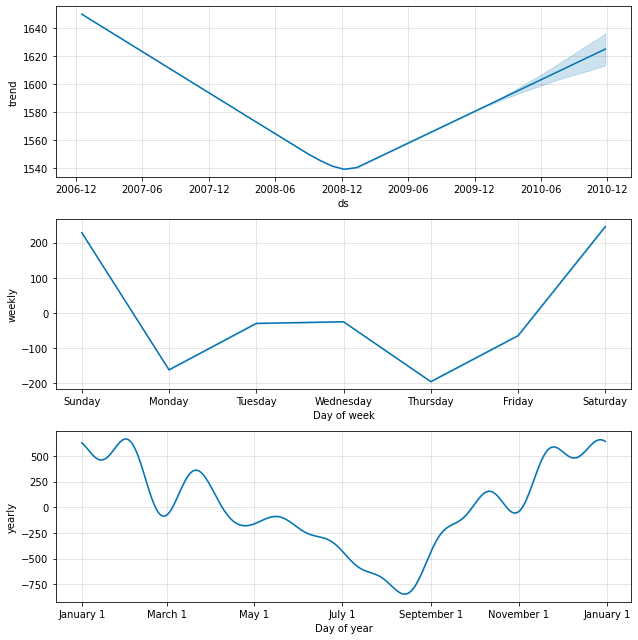

In [ ]:
model.plot_components(result_df)

In [ ]:
new_df = daily_data.reset_index()
new_df_multi = new_df.rename(columns={"datetime": "ds", "Global_active_power": "y","Global_reactive_power": "add1","Voltage": "add2","Global_intensity": "add3","Sub_metering_1": "add4","Sub_metering_2": "add5","Sub_metering_3": "add6"})
X_test_multi = new_df_multi.tail(365)
X_train_multi = new_df_multi[:-365]

In [ ]:
X_test_multi.head()

,index,ds,y,add1,add2,add3,add4,add5,add6
1077,1077,2009-11-27,1380.026001,133.052002,348276.68750,5704.000000,0.0,396.0,11599.0
1078,1078,2009-11-28,1858.949951,225.218002,347898.87500,7784.799805,3199.0,386.0,14350.0
1079,1079,2009-11-29,1650.962036,191.056000,350364.56250,6878.399902,1073.0,3061.0,7828.0
1080,1080,2009-11-30,1745.189941,153.382004,351020.59375,7232.200195,1080.0,361.0,12039.0
1081,1081,2009-12-01,1756.378052,141.873993,349391.75000,7312.799805,0.0,354.0,10821.0


In [ ]:
print(X_train_multi)

      index         ds            y  ...    add4    add5     add6
0         0 2006-12-16  1209.176025  ...     0.0   546.0   4926.0
1         1 2006-12-17  3390.459961  ...  2033.0  4187.0  13341.0
2         2 2006-12-18  2203.825928  ...  1063.0  2621.0  14018.0
3         3 2006-12-19  1666.193970  ...   839.0  7602.0   6197.0
4         4 2006-12-20  2225.748047  ...     0.0  2648.0  14063.0
...     ...        ...          ...  ...     ...     ...      ...
1072   1072 2009-11-22  2450.976074  ...  6774.0   411.0  16097.0
1073   1073 2009-11-23  1471.121948  ...     0.0   402.0   8230.0
1074   1074 2009-11-24  2128.855957  ...  2491.0  4579.0   9086.0
1075   1075 2009-11-25  1980.130005  ...   745.0  5083.0  10596.0
1076   1076 2009-11-26  1599.625977  ...  2262.0   407.0  10069.0

[1077 rows x 9 columns]


In [ ]:
assert len(X_train_multi) == (len(daily_data)-365)

In [ ]:
#Adding regressors ['add1','add2','add3','add4','add5','add6]
model_multi = Prophet()
model_multi.add_regressor('add1')
model_multi.add_regressor('add2')
model_multi.add_regressor('add3')
model_multi.add_regressor('add4')
model_multi.add_regressor('add5')
model_multi.add_regressor('add6')

In [ ]:
model_multi.fit(X_train_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_multi = model_multi.make_future_dataframe(periods= 365, freq = 'D')
future_multi['add1'] = new_df_multi['add1'].values
future_multi['add2'] = new_df_multi['add2'].values
future_multi['add3'] = new_df_multi['add3'].values
future_multi['add4'] = new_df_multi['add4'].values
future_multi['add5'] = new_df_multi['add5'].values
future_multi['add6'] = new_df_multi['add6'].values

In [ ]:
#shape of future_multi
future_multi.shape

(1442, 7)

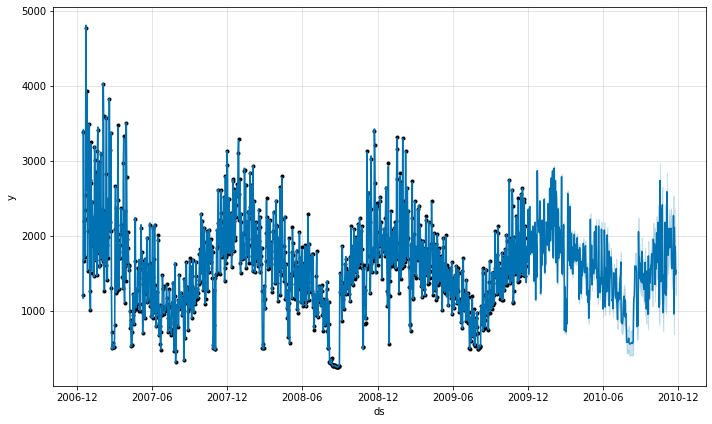

In [ ]:
#plot result_multi
model_multi.plot(result_multi)
plt.show()

In [ ]:
#mean abs percent error
mean_absolute_percentage_error( X_test_multi['y'][-365:], result_multi['yhat'][-365:])

2.524600730940676

In [ ]:
rmse_multi = sqrt(mean_squared_error( X_test_multi['y'][-365:], result_multi['yhat'][-365:]))
print(rmse_multi)

37.72975137192857


In [ ]:
print(X_train_df)

             ds            y
0    2006-12-16  1209.176025
1    2006-12-17  3390.459961
2    2006-12-18  2203.825928
3    2006-12-19  1666.193970
4    2006-12-20  2225.748047
...         ...          ...
1072 2009-11-22  2450.976074
1073 2009-11-23  1471.121948
1074 2009-11-24  2128.855957
1075 2009-11-25  1980.130005
1076 2009-11-26  1599.625977

[1077 rows x 2 columns]


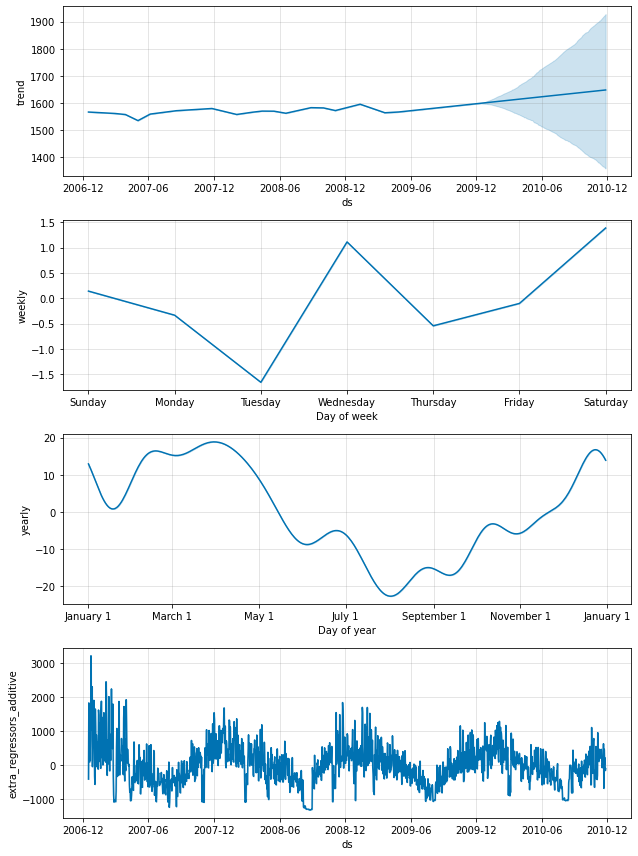

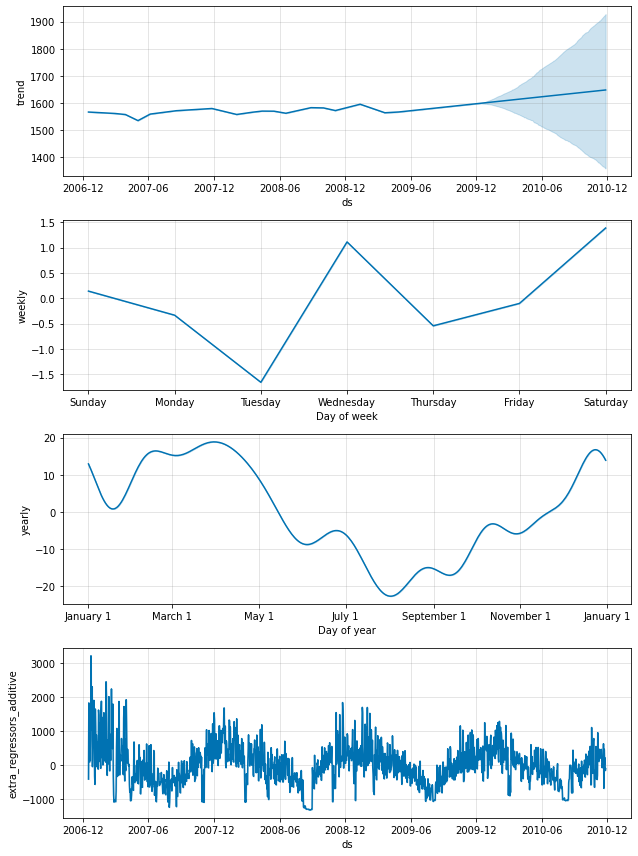

In [45]:

model_multi.plot_components(result_multi)